<a href="https://colab.research.google.com/github/ShhreyashPandey/NLP/blob/main/NLP_Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shhreyash Pandey

22070126105

AIML-B2

# AG News Classification Dataset

Preprocessing the dataset to get cleaned version of it and then saving it to reduce the computation load on every run.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import string
from sklearn.model_selection import train_test_split
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
!pip install contractions
import contractions

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load SpaCy model for tokenization and lemmatization
nlp = spacy.load("en_core_web_sm")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
train.shape

(120000, 3)

In [ ]:
train.describe()

,Class Index
count,120000.000000
mean,2.500000
std,1.118039
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [ ]:
test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [ ]:
test.shape

(7600, 3)

In [ ]:
# Remove empty rows and duplicates from both train and test set
train.dropna(inplace=True)
train.drop_duplicates(inplace=True)

test.dropna(inplace=True)
test.drop_duplicates(inplace=True)

In [ ]:
print(train.shape)
print(test.shape)

(120000, 3)
(7600, 3)


# Pre-processing

In [ ]:
#Regular Expression
regexp = RegexpTokenizer("[\w']+")

In [ ]:
#Lowercase
def text_lower(text):
  text = text.lower()
  return text

In [ ]:
#Remove Whitespace
def remove_whitespace(text):
  text = re.sub(r'\s+', ' ', text).strip()
  return text

In [ ]:
#Remove Punctuation
def remove_punctuation(text):
  punct = string.punctuation
  punct = punct.replace("'","")
  text = text.translate(str.maketrans("", "",punct))
  return text

In [ ]:
#Remove HTML
def remove_html(text):
  html = re.compile(r'<.*?>')
  text = html.sub(r'',text)
  return text

In [ ]:
# Removing emojis
def remove_emoji(text):
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+",flags=re.UNICODE
  )
  text = emoji_pattern.sub(r'',text)
  return text

In [ ]:
#Remove URLS
def remove_http_links(text):
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  return text

In [ ]:
#Convert Contractions
def convert_contractions(text):
  text = contractions.fix(text)
  return text

In [ ]:
#Remove Stopwords
def remove_stopwords(text):
  text = " ".join([word for word in nltk.tokenize.word_tokenize(text) if word not in stopwords.words('english')])
  return text

In [ ]:
# Lemmatization
def lemmatize(text):
  text = " ".join([token.lemma_ for token in nlp(text)])
  return text

In [ ]:
#Remove Non-Alphabetic Characters
def discard_non_alpha(text):
  word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
  text = " ".join(word_list_non_alpha)
  return text

In [ ]:
#Aggregating All definitions
def preprocess_text(text):
  text = text_lower(text)
  text = remove_whitespace(text)
  text = re.sub('\n' , '', text)
  text = re.sub('\[.*?\]', '', text)
  text = remove_http_links(text)
  text = remove_punctuation(text)
  text = remove_html(text)
  text = remove_emoji(text)
  #text = convert_abbrev(text)
  text = convert_contractions(text)
  text = remove_stopwords(text)
  text = discard_non_alpha(text)
  text = lemmatize(text)

  return text

In [ ]:
# Apply preprocessing to the dataset
train['cleaned_description'] = train['Description'].apply(preprocess_text)

In [ ]:
# Applying on testing set
test['cleaned_description'] = test['Description'].apply(preprocess_text)

In [ ]:
# Save the processed data to CSV files
train.to_csv('processed_train.csv', index=False)
test.to_csv('processed_test.csv', index=False)

print("Processed data saved successfully!")

Processed data saved successfully!


Now, applying LSTM Model on preprocessed dataset

In [ ]:
# Load the preprocessed datasets
train = pd.read_csv('/content/processed_train.csv')
test = pd.read_csv('/content/processed_test.csv')

The Tokenizer assigns an index to each word in the dataset. If the max_words parameter is set to 10,000, the indices for words should range between 0 and 9,999.

In [ ]:
# Finding max length of sentence in the dataset
max_sequence_length = train['cleaned_description'].apply(lambda x: len(x.split())).max()
print("Maximum sentence length:", max_sequence_length)

# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train['cleaned_description'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(train['cleaned_description'])

# Pad sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Split data into train and test sets
y = train['Class Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Maximum sentence length: 95


Setting parameters and training LSTM Models
1. Single Layer LSTM
2. Two Layer LSTM

Printing their classification report and confusion matrix.

In [ ]:
# Parameters for Set 1
batch_size_1 = 4
max_sequence_length_1=max_sequence_length
embedding_dim_1 = 10
lstm_units_1 = 8
max_words_1 = 10000

# Parameters for Set 2
batch_size_2 = 8
max_sequence_length_2= max_sequence_length
embedding_dim_2 = 30
lstm_units_2 = 16
max_words_2 = 25000

In [ ]:
# Model 1: Single-layer LSTM
model1 = Sequential()
model1.add(Embedding(input_dim=max_words_1, output_dim=embedding_dim_1, input_length=max_sequence_length_1))
model1.add(LSTM(units=lstm_units_1))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(X_train, y_train, epochs=5, batch_size=batch_size_1, validation_split=0.2)

Epoch 1/5
19200/19200 ━━━━━━━━━━━━━━━━━━━━ 610s 32ms/step - accuracy: 0.2490 - loss: -67.4049 - val_accuracy: 0.2514 - val_loss: -249.8148
Epoch 2/5
19200/19200 ━━━━━━━━━━━━━━━━━━━━ 607s 31ms/step - accuracy: 0.2524 - loss: -310.3482 - val_accuracy: 0.2514 - val_loss: -492.5465
Epoch 3/5
19200/19200 ━━━━━━━━━━━━━━━━━━━━ 583s 30ms/step - accuracy: 0.2514 - loss: -552.0841 - val_accuracy: 0.2514 - val_loss: -735.5290
Epoch 4/5
19200/19200 ━━━━━━━━━━━━━━━━━━━━ 580s 30ms/step - accuracy: 0.2506 - loss: -798.0848 - val_accuracy: 0.2514 - val_loss: -978.2407
Epoch 5/5
19200/19200 ━━━━━━━━━━━━━━━━━━━━ 620s 30ms/step - accuracy: 0.2502 - loss: -1038.1273 - val_accuracy: 0.2514 - val_loss: -1221.2896


In [ ]:
# Model 2: Two-layer LSTM
model2 = Sequential()
model2.add(Embedding(input_dim=max_words_2, output_dim=embedding_dim_2, input_length=max_sequence_length_2))
model2.add(LSTM(units=lstm_units_2, return_sequences=True))
model2.add(LSTM(units=lstm_units_2))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X_train, y_train, epochs=5, batch_size=batch_size_2, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 657s 68ms/step - accuracy: 0.2518 - loss: -66.2587 - val_accuracy: 0.2514 - val_loss: -244.5592
Epoch 2/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 685s 68ms/step - accuracy: 0.2492 - loss: -304.3578 - val_accuracy: 0.2514 - val_loss: -480.9278
Epoch 3/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 687s 69ms/step - accuracy: 0.2484 - loss: -540.1713 - val_accuracy: 0.2514 - val_loss: -717.3910
Epoch 4/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 678s 68ms/step - accuracy: 0.2520 - loss: -776.4479 - val_accuracy: 0.2514 - val_loss: -954.0824
Epoch 5/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 682s 68ms/step - accuracy: 0.2509 - loss: -1011.8498 - val_accuracy: 0.2514 - val_loss: -1190.7961


750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step
Set 1 Classification Report
              precision    recall  f1-score   support

           1       0.25      1.00      0.40      5956
           2       0.00      0.00      0.00      6058
           3       0.00      0.00      0.00      5911
           4       0.00      0.00      0.00      6075

    accuracy                           0.25     24000
   macro avg       0.06      0.25      0.10     24000
weighted avg       0.06      0.25      0.10     24000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


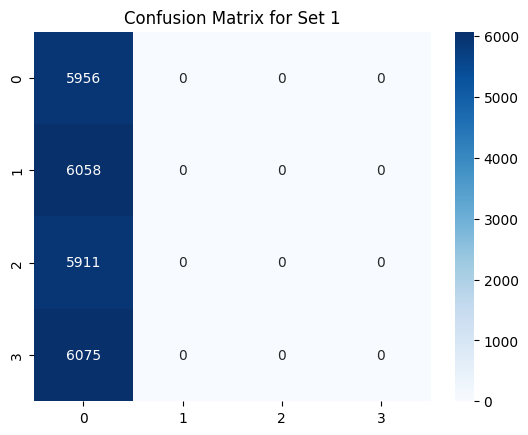

In [ ]:
# Convert predictions to binary
preds1 = model1.predict(X_test)
preds1 = (preds1 > 0.5).astype(int)

# Classification Report
print("Set 1 Classification Report")
print(classification_report(y_test, preds1))

# Confusion Matrix with Heatmap for Set 1
cm1 = confusion_matrix(y_test, preds1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Set 1")
plt.show()

750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step
Set 2 Classification Report
              precision    recall  f1-score   support

           1       0.25      1.00      0.40      5956
           2       0.00      0.00      0.00      6058
           3       0.00      0.00      0.00      5911
           4       0.00      0.00      0.00      6075

    accuracy                           0.25     24000
   macro avg       0.06      0.25      0.10     24000
weighted avg       0.06      0.25      0.10     24000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


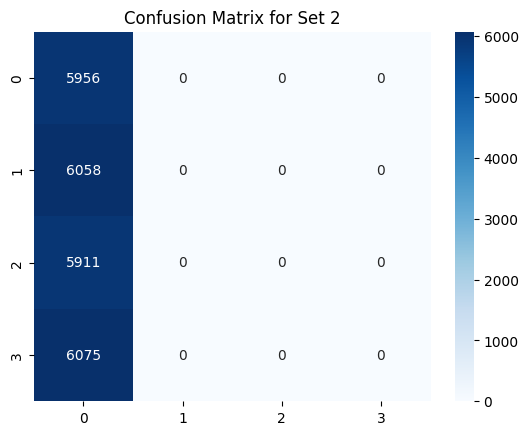

In [ ]:
# Convert predictions to binary
preds2 = model2.predict(X_test)
preds2 = (preds2 > 0.5).astype(int)

# Classification Report
print("Set 2 Classification Report")
print(classification_report(y_test, preds2))

# Confusion Matrix with Heatmap for Set 2
cm2 = confusion_matrix(y_test, preds2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Set 2")
plt.show()

Training few more models with different number of layers and different parameters set to increase the accuracy of the trained model.

In [ ]:
# Parameters for Set 3
batch_size_3 = 16
max_sequence_length_3 = 10000
embedding_dim_3 = 10
lstm_units_3 = 32
max_words_3 = 30000

# Model 3: Three-layer LSTM with better accuracy
model3 = Sequential()
model3.add(Embedding(input_dim=max_words_3, output_dim=embedding_dim_3, input_length=max_sequence_length_3))
model3.add(LSTM(units=lstm_units_3, return_sequences=True))
model3.add(LSTM(units=lstm_units_3, return_sequences=True))
model3.add(LSTM(units=lstm_units_3))
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model3.fit(X_train, y_train, epochs=10, batch_size=batch_size_3, validation_split=0.2)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 518s 105ms/step - accuracy: 0.2516 - loss: -70.1360 - val_accuracy: 0.2514 - val_loss: -246.6379
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 555s 104ms/step - accuracy: 0.2499 - loss: -304.6071 - val_accuracy: 0.2514 - val_loss: -480.1788
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 507s 105ms/step - accuracy: 0.2512 - loss: -538.2863 - val_accuracy: 0.2514 - val_loss: -713.6916
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 494s 103ms/step - accuracy: 0.2498 - loss: -771.2616 - val_accuracy: 0.2514 - val_loss: -947.2249
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 494s 103ms/step - accuracy: 0.2505 - loss: -1004.6306 - val_accuracy: 0.2514 - val_loss: -1180.5095
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 493s 103ms/step - accuracy: 0.2502 - loss: -1238.8169 - val_accuracy: 0.2514 - val_loss: -1414.2094
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 491s 102ms/step - accuracy: 0.2511 - loss: -1469.5076 - val_accuracy: 0.2514 - val_loss: -1647.7360
Epoch 8/10
4800

In [ ]:
# Parameters for Set 4
batch_size_4 = 32
max_sequence_length_4 = 10000
embedding_dim_4 = 20
lstm_units_4 = 40
max_words_4 = 40000

# Model 4: Four-layer LSTM with better accuracy
model4 = Sequential()
model4.add(Embedding(input_dim=max_words_4, output_dim=embedding_dim_4, input_length=max_sequence_length_4))
model4.add(LSTM(units=lstm_units_4, return_sequences=True))
model4.add(LSTM(units=lstm_units_4, return_sequences=True))
model4.add(LSTM(units=lstm_units_4, return_sequences=True))
model4.add(LSTM(units=lstm_units_4))
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model4.fit(X_train, y_train, epochs=10, batch_size=batch_size_4, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 407s 167ms/step - accuracy: 0.2500 - loss: -50.4228 - val_accuracy: 0.2514 - val_loss: -162.3777
Epoch 2/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 431s 162ms/step - accuracy: 0.2534 - loss: -198.4246 - val_accuracy: 0.2514 - val_loss: -308.8767
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 460s 170ms/step - accuracy: 0.2497 - loss: -345.2394 - val_accuracy: 0.2514 - val_loss: -455.0283
Epoch 4/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 422s 161ms/step - accuracy: 0.2501 - loss: -490.8523 - val_accuracy: 0.2514 - val_loss: -601.3679
Epoch 5/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 447s 163ms/step - accuracy: 0.2482 - loss: -638.8656 - val_accuracy: 0.2514 - val_loss: -747.2888
Epoch 6/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 445s 164ms/step - accuracy: 0.2498 - loss: -782.7460 - val_accuracy: 0.2514 - val_loss: -893.7407
Epoch 7/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 395s 164ms/step - accuracy: 0.2527 - loss: -928.7026 - val_accuracy: 0.2514 - val_loss: -1039.9996
Epoch 8/10
2400/2400

In [ ]:
# Parameters for Set 5
batch_size_5 = 32
max_sequence_length_5 = 10000
embedding_dim_5 = 20
lstm_units_5 = 40
max_words_5 = 40000

# Model 4: Four-layer LSTM with better accuracy
model4 = Sequential()
model4.add(Embedding(input_dim=max_words_5, output_dim=embedding_dim_5, input_length=max_sequence_length_5))
model4.add(LSTM(units=lstm_units_5, return_sequences=True))
model4.add(LSTM(units=lstm_units_5, return_sequences=True))
model4.add(LSTM(units=lstm_units_5, return_sequences=True))
model4.add(LSTM(units=lstm_units_5))
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model4.fit(X_train, y_train, epochs=10, batch_size=batch_size_5, validation_split=0.2)

Epoch 1/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 429s 172ms/step - accuracy: 0.2510 - loss: -49.9303 - val_accuracy: 0.2514 - val_loss: -161.9198
Epoch 2/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 443s 172ms/step - accuracy: 0.2507 - loss: -198.1964 - val_accuracy: 0.2514 - val_loss: -308.2999
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 423s 164ms/step - accuracy: 0.2513 - loss: -342.7008 - val_accuracy: 0.2514 - val_loss: -454.7644
Epoch 4/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 457s 171ms/step - accuracy: 0.2501 - loss: -492.0368 - val_accuracy: 0.2514 - val_loss: -600.6752
Epoch 5/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 447s 173ms/step - accuracy: 0.2497 - loss: -636.9741 - val_accuracy: 0.2514 - val_loss: -747.0337
Epoch 6/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 423s 165ms/step - accuracy: 0.2513 - loss: -783.4189 - val_accuracy: 0.2514 - val_loss: -893.2437
Epoch 7/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 445s 166ms/step - accuracy: 0.2499 - loss: -932.4196 - val_accuracy: 0.2514 - val_loss: -1039.4160
Epoch 8/10
2400/2400

The accuracy of LSTM Model is around 25% only, even with varibale set of parameters. For this dataset, we can say that Machine Learning Models performed better than LSTM(on comparing the Assignment 1 and 2)

# Dividing Data into Chunks and then train the model sequentially.

In [ ]:
# Parameters
batch_size = 4
max_words = 10000
embedding_dim = 10
lstm_units = 8
epochs = 5

# Function to split data into chunks
def chunk_data(X, y, chunk_size):
    num_chunks = len(X) // chunk_size + int(len(X) % chunk_size != 0)
    X_chunks = np.array_split(X, num_chunks)
    y_chunks = np.array_split(y, num_chunks)
    return X_chunks, y_chunks

# Initialize the model
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(LSTM(units=lstm_units, return_sequences=True))
    model.add(LSTM(units=lstm_units))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model for the first chunk
model = create_model()

# Split the data into chunks
chunk_size = 1000  # Define the size of each chunk
X_chunks, y_chunks = chunk_data(X_train, y_train, chunk_size)

# Iterative training process
for i, (X_chunk, y_chunk) in enumerate(zip(X_chunks, y_chunks)):
    print(f"Training on chunk {i+1}/{len(X_chunks)}")

    # Fit the model on the current chunk
    model.fit(X_chunk, y_chunk, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    # Optionally save the model weights after each chunk
    model.save_weights(f"model_weights_chunk_{i+1}.weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Training on chunk 1/96
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 118ms/step - accuracy: 0.2746 - loss: -1.2264 - val_accuracy: 0.2350 - val_loss: -5.9944
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.2574 - loss: -7.0693 - val_accuracy: 0.2350 - val_loss: -9.2613
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.2619 - loss: -9.8623 - val_accuracy: 0.2350 - val_loss: -12.0658
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.2759 - loss: -12.2250 - val_accuracy: 0.2350 - val_loss: -14.7835
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.2607 - loss: -15.3367 - val_accuracy: 0.2350 - val_loss: -17.4161
Training on chunk 2/96
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.2556 - loss: -18.4379 - val_accuracy: 0.2450 - val_loss: -20.1503
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.2603 - loss: -21.0311 - val_accuracy: 0.2450 - val_loss: -22.8121
Epoch 3/5
200/200 ━━━━━━━━━

In [ ]:
# Parameters
batch_size = 32
max_words = 10000
embedding_dim = 20
lstm_units = 40
epochs = 5

# Function to split data into chunks
def chunk_data(X, y, chunk_size):
    num_chunks = len(X) // chunk_size + int(len(X) % chunk_size != 0)
    X_chunks = np.array_split(X, num_chunks)
    y_chunks = np.array_split(y, num_chunks)
    return X_chunks, y_chunks

# Initialize the model
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(LSTM(units=lstm_units, return_sequences=True))
    model.add(LSTM(units=lstm_units))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model for the first chunk
model = create_model()

# Split the data into chunks
chunk_size = 1000  # Define the size of each chunk
X_chunks, y_chunks = chunk_data(X_train, y_train, chunk_size)

# Iterative training process
for i, (X_chunk, y_chunk) in enumerate(zip(X_chunks, y_chunks)):
    print(f"Training on chunk {i+1}/{len(X_chunks)}")

    # Fit the model on the current chunk
    model.fit(X_chunk, y_chunk, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    # Optionally save the model weights after each chunk
    model.save_weights(f"model_weights_chunk_{i+1}.weights.h5")

Training on chunk 1/96
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.2508 - loss: -0.3495 - val_accuracy: 0.2350 - val_loss: -7.3736
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.2379 - loss: -9.3798 - val_accuracy: 0.2350 - val_loss: -13.3945
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.2448 - loss: -14.3153 - val_accuracy: 0.2350 - val_loss: -16.5945
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.2588 - loss: -17.2948 - val_accuracy: 0.2350 - val_loss: -18.7737
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.2729 - loss: -19.2298 - val_accuracy: 0.2350 - val_loss: -20.6087
Training on chunk 2/96
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.2511 - loss: -21.7506 - val_accuracy: 0.2450 - val_loss: -22.4503
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.2519 - loss: -23.9373 - val_accuracy: 0.2450 - val_loss: -24.1758
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.2630 - loss: -2

In [1]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [2]:
!pip install pypandoc

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!jupyter nbconvert --to PDF "drive/My Drive/Colab Notebooks/NLP_Assign2.ipynb"

[NbConvertApp] Converting notebook drive/My Drive/Colab Notebooks/NLP_Assign2.ipynb to PDF
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][45]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stdout',
 'output_type': 'stream',
 'text': 'Training on chunk 1/96\nEpoch 1/5\n'}
[NbConvertApp] Support files will be in NLP_Assign2_files/
[NbConvertApp] Making directory ./NLP_Assign2_files
[NbConvertApp] Making directory ./NLP_Assign2_files
[NbConvertApp] Writing 296682 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 216847 bytes to drive/My Drive/Colab Notebo